# İş Problemi

İngiltere merkezli perakende şirketi müşterilerini segmentlere ayırıp bu segmentlere göre pazarlama stratejileri belirlemek istemektedir.

Ortak davranışlar sergileyen müşteri segmentleri özelinde pazarlama çalışmaları yapmanın gelir artışı sağlayacağını düşünmektedir.

Segmentlere ayırmak için RFM analizi kullanılacaktır.

# Veri Seti Hikayesi

Online Retail II isimli veri seti İngiltere merkezli bir perakende şirketinin 01/12/2009 - 09/12/2011 tarihleri arasındaki online satış işlemlerini içeriyor. Şirketin ürün kataloğunda hediyelik eşyalar yer almaktadır ve çoğu müşterisinin toptancı olduğu bilgisi mevcuttur.

# Görev 1: Veriyi Anlama ve Hazırlama

Adım 1: Online Retail II excelindeki 2010-2011 verisini okuyunuz. Oluşturduğunuz dataframe’in kopyasını oluşturunuz.

Adım 2: Veri setinin betimsel istatistiklerini inceleyiniz.

Adım 3: Veri setinde eksik gözlem var mı? Varsa hangi değişkende kaç tane eksik gözlem vardır?

Adım 4: Eksik gözlemleri veri setinden çıkartınız. Çıkarma işleminde ‘inplace=True’ parametresini kullanınız.

Adım 5: Eşsiz ürün sayısı kaçtır?

Adım 6: Hangi üründen kaçar tane vardır?

Adım 7: En çok sipariş edilen 5 ürünü çoktan aza doğru sıralayınız

Adım 8: Faturalardaki ‘C’ iptal edilen işlemleri göstermektedir. İptal edilen işlemleri veri setinden çıkartınız.

Adım 9: Fatura başına elde edilen toplam kazancı ifade eden ‘TotalPrice’ adında bir değişken oluşturunuz

In [2]:
import pandas as pd
import datetime as dt

df_ = pd.read_excel('/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/02 - CRM Analytics/00_datasets/online_retail_II.xlsx', sheet_name='Year 2010-2011')

In [3]:
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541910, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
Price               0
Customer ID    135080
Country             0
dtype: int64

In [7]:
df.dropna(inplace=True)
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [8]:
df.nunique()

Invoice        22190
StockCode       3684
Description     3896
Quantity         436
InvoiceDate    20460
Price            620
Customer ID     4372
Country           37
dtype: int64

In [9]:
df['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: Description, Length: 3896, dtype: int64

In [10]:
df.groupby('Description').agg({'Quantity':'sum'}).sort_values('Quantity', ascending=False).head()

,Quantity
Description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,53215
JUMBO BAG RED RETROSPOT,45066
ASSORTED COLOUR BIRD ORNAMENT,35314
WHITE HANGING HEART T-LIGHT HOLDER,34147
PACK OF 72 RETROSPOT CAKE CASES,33409


In [11]:
df = df[~df['Invoice'].astype('str').str.startswith('C')]

In [12]:
df['TotalPrice'] = df['Quantity'] * df['Price']
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


# Görev 2: RFM Metriklerinin Hesaplanması

Adım 1: Recency, Frequency ve Monetary tanımlarını yapınız.

Adım 2: Müşteri özelinde Recency, Frequency ve Monetary metriklerini groupby, agg ve lambda ile hesaplayınız.

Adım 3: Hesapladığınız metrikleri rfm isimli bir değişkene atayınız.

Adım 4: Oluşturduğunuz metriklerin isimlerini recency, frequency ve monetary olarak değiştiriniz.

Notlar: 

recency değeri için bugünün tarihini (2011, 12, 11) olarak kabul ediniz.

rfm dataframe’ini oluşturduktan sonra veri setini "monetary>0" olacak şekilde filtreleyiniz.

In [13]:
#Recency: Yenilik. Müşterinin en son ne zaman alışveriş yaptığını gösterir
#Frequency: Müşterinin işlem sıklığını gösterir
#Monetary: Müşterinin bıraktığı parasal değeri gösterir

In [14]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [15]:
today_date = dt.datetime(2011, 12, 11)

In [16]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days,
    'Invoice': lambda invoice: invoice.nunique(),
    'TotalPrice':'sum'
})
rfm.head()

,InvoiceDate,Invoice,TotalPrice
Customer ID,,,
12346.0,326,1,77183.60
12347.0,3,7,4310.00
12348.0,76,4,1797.24
12349.0,19,1,1757.55
12350.0,311,1,334.40


In [17]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [18]:
rfm = rfm[rfm['Monetary']>0]

In [19]:
rfm.reset_index(inplace=True)

In [20]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary
0,12346.0,326,1,77183.60
1,12347.0,3,7,4310.00
2,12348.0,76,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,311,1,334.40


# Görev 3: RFM Skorlarının Oluşturulması ve Tek bir Değişkene Çevrilmesi

Adım 1: Recency, Frequency ve Monetary metriklerini qcut yardımı ile 1-5 arasında skorlara çeviriniz.

Adım 2: Bu skorları recency_score, frequency_score ve monetary_score olarak kaydediniz.

Adım 3: recency_score ve frequency_score’u tek bir değişken olarak ifade ediniz ve RF_SCORE olarak kaydediniz.

In [21]:
rfm['RecencyScore'] = pd.qcut(rfm['Recency'], 5, [5,4,3,2,1])
rfm['FrequencyScore'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, [1,2,3,4,5])
rfm['MonetaryScore'] = pd.qcut(rfm['Monetary'], 5, [1,2,3,4,5])
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore
0,12346.0,326,1,77183.60,1,1,5
1,12347.0,3,7,4310.00,5,5,5
2,12348.0,76,4,1797.24,2,4,4
3,12349.0,19,1,1757.55,4,1,4
4,12350.0,311,1,334.40,1,1,2


# Görev 4: RF Skorunun Segment Olarak Tanımlanması

Adım 1: Oluşturulan RF skorları için segment tanımlamaları yapınız.

Adım 2: Aşağıdaki seg_map yardımı ile skorları segmentlere çeviriniz.

In [22]:
rfm['RF_Score'] = rfm['RecencyScore'].astype('str') + rfm['FrequencyScore'].astype('str')
rfm['RFM_Score'] = rfm['RecencyScore'].astype('str') + rfm['FrequencyScore'].astype('str') + rfm['MonetaryScore'].astype('str')

In [23]:
rfm

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_Score,RFM_Score
0,12346.0,326,1,77183.60,1,1,5,11,115
1,12347.0,3,7,4310.00,5,5,5,55,555
2,12348.0,76,4,1797.24,2,4,4,24,244
3,12349.0,19,1,1757.55,4,1,4,41,414
4,12350.0,311,1,334.40,1,1,2,11,112
...,...,...,...,...,...,...,...,...,...
4333,18280.0,278,1,180.60,1,2,1,12,121
4334,18281.0,181,1,80.82,1,2,1,12,121
4335,18282.0,8,2,178.05,5,3,1,53,531
4336,18283.0,4,16,2094.88,5,5,5,55,555


In [24]:
seg_map = {
    r'[1-2][1-2]': 'hibernating',
    r'[1-2][3-4]': 'at_Risk',
    r'[1-2]5': 'cant_loose',
    r'3[1-2]': 'about_to_sleep',
    r'33': 'need_attention',
    r'[3-4][4-5]': 'loyal_customers',
    r'41': 'promising',
    r'51': 'new_customers',
    r'[4-5][2-3]': 'potential_loyalists',
    r'5[4-5]': 'champions'
}

In [25]:
rfm['Segment'] = rfm['RF_Score'].replace(seg_map, regex=True)

In [26]:
rfm.head()

,Customer ID,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RF_Score,RFM_Score,Segment
0,12346.0,326,1,77183.60,1,1,5,11,115,hibernating
1,12347.0,3,7,4310.00,5,5,5,55,555,champions
2,12348.0,76,4,1797.24,2,4,4,24,244,at_Risk
3,12349.0,19,1,1757.55,4,1,4,41,414,promising
4,12350.0,311,1,334.40,1,1,2,11,112,hibernating


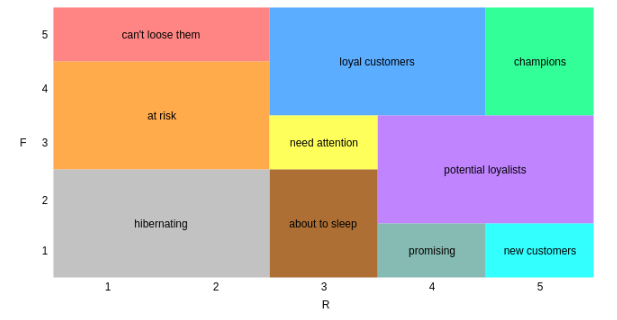

In [27]:
from IPython.display import Image
Image(filename='/Users/mericgenc/Desktop/Python - Data Science/Miuul Data Scientist Path/02 - CRM Analytics/04_flo_rfm_analizi/dataset/rfm_score.png')

# Görev 5: Aksiyon Zamanı !

Adım 1: Önemli gördüğünü 3 segmenti seçiniz. Bu üç segmenti hem aksiyon kararları açısından hemde segmentlerin yapısı açısından(ortalama RFM değerleri) yorumlayınız.

Adım 2: "Loyal Customers" sınıfına ait customer ID'leri seçerek excel çıktısını alınız.

In [28]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"]).sort_values(('Recency','mean'))

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
champions              6.361769   633  12.417062   633  6857.963918   633
new_customers          7.428571    42   1.000000    42   388.212857    42
potential_loyalists   17.398760   484   2.010331   484  1041.222004   484
promising             23.510638    94   1.000000    94   294.007979    94
loyal_customers       33.608059   819   6.479853   819  2864.247791   819
need_attention        52.427807   187   2.326203   187   897.627861   187
about_to_sleep        53.312500   352   1.161932   352   471.994375   352
cant_loose           132.968254    63   8.380952    63  2796.155873    63
at_Risk              153.785835   593   2.878583   593  1084.535297   593
hibernating          217.605042  1071   1.101774  1071   488.643307  1071

Recency'lere göre baktığımızda en düşük yani en iyi değerin 'champions' grubunda olduğunu görüyoruz. Aynı zamanda en sık alışveren yapan segment bu olduğu için en yüksek grupta.
Recency'si en düşük ikinci segment de daha yeni alışveriş yapmış olan new_customerlar.

Potential_Loyalist'lerin son siparişleri üzerinden çok vakit geçmemiş ancak sıklıkları en yükseklerden diyemeyiz.
Buna en yakın grup olan Loyal_Customer'lar ise Potansiyel olanlar kadar yakın zamanda alışveriş yapmasa bile sıklıkları ile ön plana çıkıyorlar.

Düşük gruplardan ise Can't Loose'a bakarsak; bu grubu kaybetmememiz gerekmesinin sebebi çok yüksek frekansta alışveriş yapmış olmaları ancak son alışverişlerinden epey zaman geçmiş. Bu yüzden bu segmente kendimizi hatırlatmamız ve tekrar çekmemiz gerekiyor.

In [29]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"]).sort_values(('Monetary','mean'), ascending=False)

Recency        Frequency           Monetary      
                           mean count       mean count         mean count
Segment                                                                  
champions              6.361769   633  12.417062   633  6857.963918   633
loyal_customers       33.608059   819   6.479853   819  2864.247791   819
cant_loose           132.968254    63   8.380952    63  2796.155873    63
at_Risk              153.785835   593   2.878583   593  1084.535297   593
potential_loyalists   17.398760   484   2.010331   484  1041.222004   484
need_attention        52.427807   187   2.326203   187   897.627861   187
hibernating          217.605042  1071   1.101774  1071   488.643307  1071
about_to_sleep        53.312500   352   1.161932   352   471.994375   352
new_customers          7.428571    42   1.000000    42   388.212857    42
promising             23.510638    94   1.000000    94   294.007979    94

Monetary'ye göre sıraladığımızda RF skoru yüksek olanların ortalama olarak çok para bıraktığını rahatlıkla görüyoruz.
Yukarıda bahsettiğim 'Can't Loose' segmenti çok uzun zamandır alışveriş yapmamasına rağmen çok yüksek bir noktada. En kritik segment belki de bu segment. Çünkü yeni müşteri bulmak, eldeki müşteriyi tutmaktan daha maliyetlidir. Bu segment ise neredeyse kayıp edeceğimiz bir segment.

Hibernating yani uykuda olan segmentte göze çarpan ise en fazla faturanın bu segmente kesilmiş olması. Ortalama getirisi aşağılarda olmasına rağmen bu potansiyeli uyandırmak için indirimler, kampanyalar yapılmalıdır.

In [30]:
loyal_customers = rfm[rfm['Segment']=='loyal_customers']['Customer ID']

In [31]:
loyal_customers

5       12352.0
12      12359.0
20      12370.0
29      12380.0
34      12388.0
         ...   
4303    18236.0
4317    18257.0
4318    18259.0
4322    18263.0
4337    18287.0
Name: Customer ID, Length: 819, dtype: float64

In [33]:
loyal_customers.to_excel('output/loyal_customers.xlsx', index=False)